<a href="https://colab.research.google.com/github/ankita19-user/Python_Portfolio/blob/main/Sales_Prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imporiting the required library
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Import Advertising dataset
Adv=pd.read_csv('/content/Advertising.csv')

In [ ]:
#to view advertising
Adv

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
print(Adv.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [ ]:
#finding number of rows and columns
Adv.shape

(200, 5)

In [ ]:
Adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
Adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
Adv.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
#checking duplicates
Adv.duplicated().sum()

0

**Visualising the dataset**

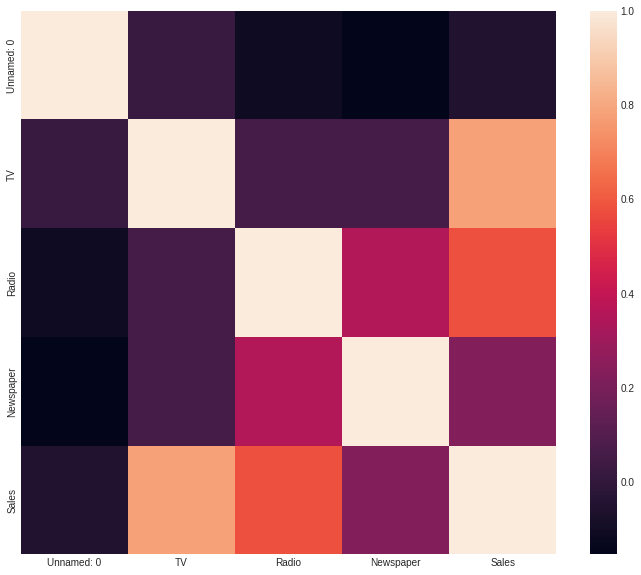

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(Adv.corr())
plt.show()

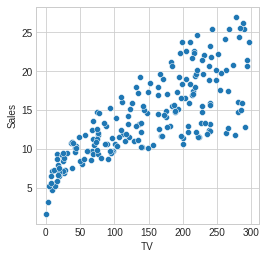

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=Adv,x=Adv['TV'],y=Adv['Sales'])
plt.show()

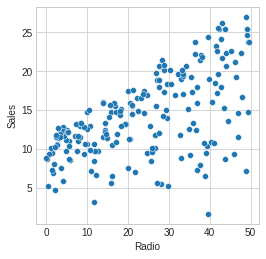

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=Adv,x=Adv['Radio'],y=Adv['Sales'])
plt.show()

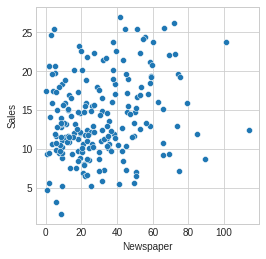

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=Adv,x=Adv['Newspaper'],y=Adv['Sales'])
plt.show()

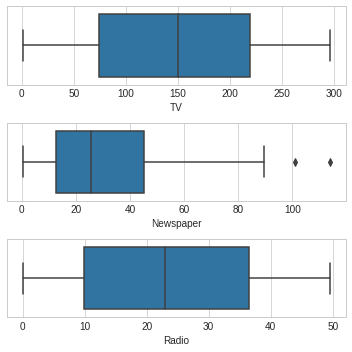

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(Adv['TV'], ax = axs[0])
plt2 = sns.boxplot(Adv['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(Adv['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

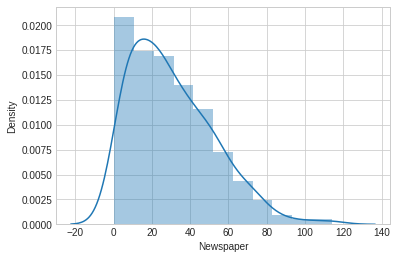

In [ ]:
sns.distplot(Adv['Newspaper'])

In [ ]:
iqr = Adv.Newspaper.quantile(0.75) - Adv.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = Adv['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = Adv['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = Adv.copy()

In [ ]:
Adv.loc[Adv['Newspaper']>=93, 'Newspaper'] = 93

<AxesSubplot:xlabel='Newspaper'>

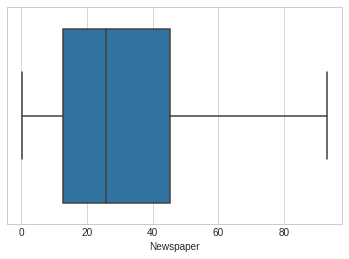

In [ ]:
sns.boxplot(Adv['Newspaper'])

<AxesSubplot:xlabel='Sales'>

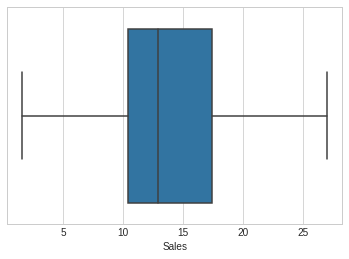

In [ ]:
sns.boxplot(Adv['Sales'])

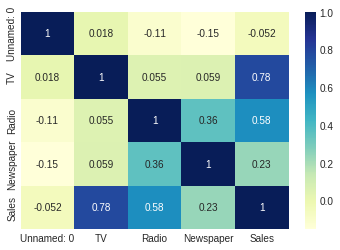

In [ ]:
sns.heatmap(Adv.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [ ]:
important_features = list(Adv.corr()['Sales'][(Adv.corr()['Sales']>+0.5)|(Adv.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
x= x.values.reshape(-1,1)

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape, y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [ ]:
print(x_train.shape, y_train.shape)

(160, 1) (160,)


In [ ]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred = knn.predict(x_test)

In [ ]:
print(knn_train_pred, knn_train_pred)

[ 9.92  8.66 13.28 16.64 20.22 11.26  5.98  7.78 14.14 12.66 13.7  18.72
 19.74 17.4  10.36  9.82 18.92 14.4  15.18  5.58 18.22 14.88 18.3  15.1
 15.76 18.9  18.02 16.14 10.88 11.04 17.4  15.76 19.96 18.92  9.98 13.7
 19.74 14.26 17.56 17.16 16.26 12.36 10.2   9.94  7.3  17.56  7.78 18.54
  8.4  15.92 15.68  9.56 15.1  14.66 11.1  19.76 19.76  5.58 19.74 15.48
  5.94 11.04 13.72 18.44 13.4  15.34 16.14 14.12 15.68 15.92 19.88  9.56
 16.98 17.16 10.18 12.04 18.72 14.12 10.36 18.3  17.36  5.26 16.02 19.76
 17.52  8.4  15.1  14.12 12.12 19.12 10.28 16.02 19.68  7.02  5.26 16.14
 11.1   8.4  16.52 20.22  7.02 20.7  18.92 14.6   9.8  10.36 13.28 16.62
 18.92 13.66  5.58 15.84 21.34 10.2  18.92 16.98 15.1  18.92 11.1  20.86
 10.94 12.92 13.6   7.78 10.94 20.86  9.98 17.52 19.12 18.5   9.8  14.6
 11.04 12.12 11.04  9.94 16.14  8.4  12.92 18.02 15.48 17.56 18.72 17.52
  9.94 18.72 19.44 11.04 12.36 13.72 13.7  18.22 16.02 13.72 16.62 14.12
  7.78 11.04 17.56  7.02] [ 9.92  8.66 13.28 16.64 20.

In [ ]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(x_train)
svr_test_predict =  svr.predict(x_test)

In [ ]:
print(svr_train_pred,svr_test_predict)

[ 8.83974431  8.60504064 13.67389372 17.0976376  17.32682343 11.7757052
  7.85950854  8.06924679 12.81109355 11.85718212 12.08307391 17.784526
 18.15937783 15.93077383  9.19740945 10.02321769 17.51507821 15.271954
 16.79024043  7.83443927 18.12753658 16.56324502 17.44022278 13.9057795
 15.20693782 17.41159909 18.14622061 14.7820088  11.67766594 10.65242123
 15.93077383 13.23294055 18.01590919 17.39238567 11.49984534 12.08307391
 18.16316811 16.86186472 18.01870252 16.37513447 16.24648931 11.22582184
  9.11819785  8.89812604  7.96301514 18.00468065  8.07831528 17.14271614
  8.36777461 15.51420685 16.98399066 10.19752537 14.03373004 12.990108
 11.41549707 17.95932181 17.95524179  7.84381599 18.14566612 15.44451319
  7.92811511 10.61742379 16.66652988 17.80047774 11.97823235 17.67944596
 14.77108992 13.07362169 16.97970216 15.51420685 17.37885986 10.23389825
 17.72054503 16.35058607 11.55475891 11.05660185 17.75170037 13.49746433
  9.3664512  17.43666967 16.4578833   7.80188851 17.9843965

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train, x_train_constant).fit()
model.params

const    7.292494
x1       0.046008
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     225.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.83e-32
Time:                        10:00:08   Log-Likelihood:                -416.03
No. Observations:                 160   AIC:                             836.1
Df Residuals:                     158   BIC:                             842.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2925      0.529     13.795      0.0

In [ ]:
#splitting the datset 
x=Adv.drop('Sales',axis=1)

In [ ]:
x

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [ ]:
y=Adv['Sales']

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [ ]:
print(x_train.shape, y_train.shape)

(160, 4) (160,)


In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#fitting the model to the dataset
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predictions
y_predictions=model.predict(x_test)

In [ ]:
y_predictions

array([10.24804047,  7.30730851,  7.01274277, 24.06113085, 11.84366214,
        6.36118083, 12.96971919, 15.01537975, 10.94783823, 16.23176862,
       22.94551695,  9.07868773, 10.29952407, 15.37453907, 11.63458734,
       12.38945141, 18.92333081, 10.72908853, 16.03312854, 17.36784911,
       23.84771881,  9.51170454, 15.25345436, 12.2517678 ,  5.81353453,
       15.20236427, 12.12443707, 20.74939713, 13.36701618,  9.16410093,
       13.10338265, 21.4773718 , 18.01665474, 21.14294735,  6.73846171,
        5.95260037,  7.82288471, 13.21282157, 14.72173995,  6.18108823])

In [ ]:
x_test = np.array(Adv.drop(["Sales"], 1))
y = np.array(Adv["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [ ]:
Adv = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(Adv)

    Predicted Sales
0         16.411936
1         20.843462
2         21.512238
3         10.652610
4         22.125925
5         13.123296
6         21.038502
7          7.503704
8         13.648199
9         15.120643
10         9.021350
11         6.705997
12        14.399565
13         8.886688
14         9.743120
15        12.215071
16         8.713240
17        16.294898
18        10.267820
19        18.806176
20        19.587782
21        13.157502
22        12.365572
23        21.314146
24         7.797910
25         5.781561
26        20.750091
27        11.955363
28         9.198887
29         8.522495
30        12.404502
31         9.948987
32        21.368839
33        12.252098
34        18.299450
35        20.134984
36        14.075762
37        20.885590
38        11.052717
39         4.551262


**Check Model Accuracy**

In [ ]:
# Lets evaluate the model for its accuracy using various metrics such as RMSE and R-Squared

from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 1.4172515423043612
RMSE: 2.1258371486646643
R-Squared 0.8282656273346081
